In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file = "Resources/Seasons_Stats.csv"
stats_pd = pd.read_csv(data_file)
stats_pd.head(2)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0


In [ ]:
#stats_pd.columns

In [3]:
data_file2 = "Resources/Players.csv"
players_pd = pd.read_csv(data_file2)
players_pd.head(2)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [4]:
players_pd['raw_inches'] = players_pd['height']* .393701

In [5]:
players_pd['rounded'] = players_pd['raw_inches'].round().apply(str)
players_pd.head(5)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state,raw_inches,rounded
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,70.866180,71.0
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,74.015788,74.0
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,75.984293,76.0
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,77.165396,77.0
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,70.078778,70.0


In [6]:
players_pd["Height in Inches"] = players_pd["rounded"].replace({'63.0':'5-03', '64.0':'5-04', '65.0':'5-05', '66.0':'5-06', \
                                '67.0':'5-07', '68.0':'5-08', '69.0':'5-09', '70.0':'5-10', '71.0':'5-11', '72.0':'6-00', \
                                '73.0':'6-01', '74.0':'6-02', '75.0':'6-03', '76.0':'6-04', '77.0':'6-05', '78.0':'6-06', \
                                '79.0':'6-07', '80.0':'6-08', '81.0':'6-09', '82.0':'6-10', '83.0':'6-11', '84.0':'7-00', \
                                '85.0':'7-01', '86.0':'7-02', '87.0':'7-03', '88.0':'7-04', '89.0':'7-05', '90.0':'7-06', \
                                                                '91.0':'7-07'})

In [7]:
players_pd.head(5)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state,raw_inches,rounded,Height in Inches
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,70.866180,71.0,5-11
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,74.015788,74.0,6-02
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,75.984293,76.0,6-04
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,77.165396,77.0,6-05
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,70.078778,70.0,5-10


In [ ]:
#grouped_inches = players_pd.groupby(['rounded']).sum()
#grouped_inches

In [ ]:
#grouped_inches["height"].count()

In [8]:
join = pd.merge(stats_pd, players_pd, on="Player")
join.tail(2)

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state,raw_inches,rounded,Height in Inches
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,3920,203.0,97.0,NaN,1994.0,Heidelberg,Germany,79.921303,80.0,6-08
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,3921,216.0,120.0,NaN,1997.0,Mostar,Bosnia and Herzegovina,85.039416,85.0,7-01


In [9]:
join_df = join[["Year","Player", "Pos", "Age", "height", "Height in Inches", "weight", "Tm", "G", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", \
                "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "TRB", "PF", "PTS", "MP", "birth_state"]]
join_df.head()

,Year,Player,Pos,Age,height,Height in Inches,weight,Tm,G,FG,...,2P%,eFG%,FT,FTA,FT%,TRB,PF,PTS,MP,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,180.0,5-11,77.0,FTW,63.0,144.0,...,0.279,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,180.0,5-11,77.0,FTW,38.0,72.0,...,0.310,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN,NaN
2,1950.0,Cliff Barker,SG,29.0,188.0,6-02,83.0,INO,49.0,102.0,...,0.372,0.372,75.0,106.0,0.708,NaN,99.0,279.0,NaN,Indiana
3,1951.0,Cliff Barker,SG,30.0,188.0,6-02,83.0,INO,56.0,51.0,...,0.252,0.252,50.0,77.0,0.649,100.0,98.0,152.0,NaN,Indiana
4,1952.0,Cliff Barker,SG,31.0,188.0,6-02,83.0,INO,44.0,48.0,...,0.298,0.298,30.0,51.0,0.588,81.0,56.0,126.0,494.0,Indiana


In [10]:
position_df = join_df
position_df.head(2)

,Year,Player,Pos,Age,height,Height in Inches,weight,Tm,G,FG,...,2P%,eFG%,FT,FTA,FT%,TRB,PF,PTS,MP,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,180.0,5-11,77.0,FTW,63.0,144.0,...,0.279,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN,NaN
1,1951.0,Curly Armstrong,G-F,32.0,180.0,5-11,77.0,FTW,38.0,72.0,...,0.310,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN,NaN


In [ ]:
#position = position_df["Pos"].copy()
#type(position)

In [ ]:
#position_df["Position"] = position

In [ ]:
#position_df.head()

In [11]:
position_df['Position'] = position_df['Pos'].replace({'G-F': 'G', 'SG': 'G', 'SF':'F', 'F-G':'F', 'F-C': 'F', \
                                                          'PG':'G', 'PF':'F', 'C-F':'C', 'SF-SG':'F', 'PF-C':'F', \
                                                          'C-PF':'C', 'SG-SF':'G', 'PF-SF':'F', 'SF-PF':'F', \
                                                          'SG-PG':'G', 'SF-PG':'F', 'C-SF':'C', 'SG-PF':'G', \
                                                           'PG-SG':'G', 'PG-SF':'G'})

C:\Users\airma\Miniconda3\envs\PythonWebMongo\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
position_df.head(5)

,Year,Player,Pos,Age,height,Height in Inches,weight,Tm,G,FG,...,eFG%,FT,FTA,FT%,TRB,PF,PTS,MP,birth_state,Position
0,1950.0,Curly Armstrong,G-F,31.0,180.0,5-11,77.0,FTW,63.0,144.0,...,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN,NaN,G
1,1951.0,Curly Armstrong,G-F,32.0,180.0,5-11,77.0,FTW,38.0,72.0,...,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN,NaN,G
2,1950.0,Cliff Barker,SG,29.0,188.0,6-02,83.0,INO,49.0,102.0,...,0.372,75.0,106.0,0.708,NaN,99.0,279.0,NaN,Indiana,G
3,1951.0,Cliff Barker,SG,30.0,188.0,6-02,83.0,INO,56.0,51.0,...,0.252,50.0,77.0,0.649,100.0,98.0,152.0,NaN,Indiana,G
4,1952.0,Cliff Barker,SG,31.0,188.0,6-02,83.0,INO,44.0,48.0,...,0.298,30.0,51.0,0.588,81.0,56.0,126.0,494.0,Indiana,G


In [13]:
players_by_position = position_df["Position"].value_counts()
players_by_position

F    10033
G     9762
C     4829
Name: Position, dtype: int64

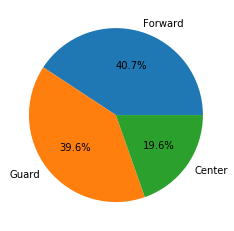

In [14]:
labels = ["Forward", "Guard", "Center"]
plt.pie(players_by_position, autopct="%1.1f%%", labels=labels)
plt.savefig("Images/Players_by_Position")

In [ ]:
#position_df.columns

In [15]:
position_df = position_df[["Position", "Year", "Player", "Pos", "Age", "height", "weight", "G", "MP", "FG",  "FGA", "FG%",\
                          "PTS", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "TRB", "PF"]]
position_df.head()

,Position,Year,Player,Pos,Age,height,weight,G,MP,FG,...,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,TRB,PF
0,G,1950.0,Curly Armstrong,G-F,31.0,180.0,77.0,63.0,NaN,144.0,...,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,217.0
1,G,1951.0,Curly Armstrong,G-F,32.0,180.0,77.0,38.0,NaN,72.0,...,NaN,72.0,232.0,0.310,0.310,58.0,90.0,0.644,89.0,97.0
2,G,1950.0,Cliff Barker,SG,29.0,188.0,83.0,49.0,NaN,102.0,...,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,99.0
3,G,1951.0,Cliff Barker,SG,30.0,188.0,83.0,56.0,NaN,51.0,...,NaN,51.0,202.0,0.252,0.252,50.0,77.0,0.649,100.0,98.0
4,G,1952.0,Cliff Barker,SG,31.0,188.0,83.0,44.0,494.0,48.0,...,NaN,48.0,161.0,0.298,0.298,30.0,51.0,0.588,81.0,56.0


In [16]:
position_yr = position_df.groupby(["Position", "Year"], as_index=False)
position_yr.mean().head(2)

,Position,Year,Age,height,weight,G,MP,FG,FGA,FG%,...,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,TRB,PF
0,C,1950.0,26.294118,203.725490,98.627451,42.823529,NaN,127.117647,358.235294,0.319706,...,NaN,127.117647,358.235294,0.319706,0.319706,118.137255,167.921569,0.661146,NaN,134.372549
1,C,1951.0,26.483871,205.387097,100.193548,43.838710,NaN,163.516129,433.677419,0.332452,...,NaN,163.516129,433.677419,0.332452,0.332452,139.741935,189.451613,0.712871,302.0,155.290323


In [17]:
position_points_yr_df = pd.DataFrame(position_yr["PTS"].mean())
position_points_yr_df.head(2)

,Position,Year,PTS
0,C,1950.0,372.372549
1,C,1951.0,466.774194


In [18]:
position_points_yr_C = position_points_yr_df.loc[ position_points_yr_df["Position"] == "C", :]
position_points_yr_C.head(2)

,Position,Year,PTS
0,C,1950.0,372.372549
1,C,1951.0,466.774194


In [19]:
year_v = []
points_c = []

for i in range(len(position_points_yr_C)):
    year_n = position_points_yr_C["Year"][i]
    points_n = position_points_yr_C["PTS"][i]
    
    year_v.append(year_n)
    points_c.append(points_n)

In [20]:
position_points_yr_F = position_points_yr_df.loc[ position_points_yr_df["Position"] == "F", :]
position_points_yr_F.reset_index(inplace=True)
position_points_yr_F.head(2)

,index,Position,Year,PTS
0,68,F,1950.0,322.601449
1,69,F,1951.0,331.937500


In [21]:
year_vf = []
points_f = []

for i in range(len(position_points_yr_F)):
    year_nf = position_points_yr_F["Year"][i]
    points_nf = position_points_yr_F["PTS"][i]
    
    year_vf.append(year_nf)
    points_f.append(points_nf)

In [ ]:
position_points_yr_G = position_points_yr_df.loc[ position_points_yr_df["Position"] == "G", :]
position_points_yr_G.reset_index(inplace=True)
position_points_yr_G.head(2)

In [ ]:
year_vg = []
points_g = []

for i in range(len(position_points_yr_G)):
    year_ng = position_points_yr_G["Year"][i]
    points_ng = position_points_yr_G["PTS"][i]
    
    year_vg.append(year_ng)
    points_g.append(points_ng)

In [ ]:
x_axis = year_v
center, = plt.plot(x_axis, points_c, label = "Center")
forward, = plt.plot(x_axis, points_f, label = "Forward")
guard, = plt.plot(x_axis, points_g, label = "Guard")
plt.ylabel("Points")
plt.title("Average Player Points by Position")
plt.grid()
plt.legend(handles=[center, forward, guard], loc="best")
plt.savefig("Images/Points_by_Position")
plt.show()

In [ ]:
position_minutes_yr_df = pd.DataFrame(position_yr["MP"].mean())
position_minutes_yr_df.head()

In [ ]:
position_height_yr_df = pd.DataFrame(position_yr["height"].mean())
position_height_yr_df.head()

analysis and graphs for points per player per season

In [22]:
yearly_df = join_df.groupby("Year", as_index=False)

In [23]:
yearly_mean = yearly_df[["Age", "height", "weight", "G", "PTS", "3P", "2P", "FT", "3P%", "2P%", "FT%", "eFG%", "PF", "MP"]].mean()
yearly_mean.head(3)

,Year,Age,height,weight,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF,MP
0,1950.0,26.131410,191.926282,86.884615,42.884615,331.929487,NaN,116.782051,98.365385,NaN,0.318109,0.683685,0.318109,114.990385,NaN
1,1951.0,26.344828,193.224138,88.068966,43.890805,375.505747,NaN,133.419540,108.666667,NaN,0.332741,0.701023,0.332741,123.494253,NaN
2,1952.0,26.130769,193.292308,88.292308,49.415385,446.892308,NaN,157.892308,131.107692,NaN,0.344500,0.691977,0.344500,144.523077,1294.792308


In [ ]:
#yearly_mean['raw_inches'] = yearly_mean['height']* .393701

In [ ]:
#yearly_mean['rounded'] = yearly_mean['raw_inches'].round().apply(str)
#yearly_mean.head(5)

In [ ]:
#yearly_mean["Height in Inches"] = yearly_mean["rounded"].replace({'63.0':'5-03', '64.0':'5-04', '65.0':'5-05', '66.0':'5-06', \
                                '67.0':'5-07', '68.0':'5-08', '69.0':'5-09', '70.0':'5-10', '71.0':'5-11', '72.0':'6-00', \
                                '73.0':'6-01', '74.0':'6-02', '75.0':'6-03', '76.0':'6-04', '77.0':'6-05', '78.0':'6-06', \
                                '79.0':'6-07', '80.0':'6-08', '81.0':'6-09', '82.0':'6-10', '83.0':'6-11', '84.0':'7-00', \
                                '85.0':'7-01', '86.0':'7-02', '87.0':'7-03', '88.0':'7-04', '89.0':'7-05', '90.0':'7-06', \
                                                                '91.0':'7-07'})

In [32]:
yearly_mean = yearly_mean.rename(columns={"height":"Height", "weight":"Height"})

In [27]:
yearly_mean['Year'] = yearly_mean['Year'].round(0)
yearly_mean['Age'] = yearly_mean['Age'].round(2)
yearly_mean['height'] = yearly_mean['height'].round(2)
yearly_mean['weight'] = yearly_mean['weight'].round(2)
yearly_mean['G'] = yearly_mean['G'].round(2)
yearly_mean['PTS'] = yearly_mean['PTS'].round(2)
yearly_mean['3P'] = yearly_mean['3P'].round(2)
yearly_mean['2P'] = yearly_mean['2P'].round(2)
yearly_mean['FT'] = yearly_mean['FT'].round(2)
yearly_mean['3P%'] = yearly_mean['3P%'].round(2)
yearly_mean['2P%'] = yearly_mean['2P%'].round(2)
yearly_mean['FT%'] = yearly_mean['FT%'].round(2)
yearly_mean['eFG%'] = yearly_mean['eFG%'].round(2)
yearly_mean['PF'] = yearly_mean['PF'].round(2)
yearly_mean['MP'] = yearly_mean['MP'].round(2)

In [33]:
yearly_mean.head(3)

,Year,Age,Height,Height,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF,MP
0,1950.0,26.13,191.93,86.88,42.88,331.93,NaN,116.78,98.37,NaN,0.32,0.68,0.32,114.99,NaN
1,1951.0,26.34,193.22,88.07,43.89,375.51,NaN,133.42,108.67,NaN,0.33,0.70,0.33,123.49,NaN
2,1952.0,26.13,193.29,88.29,49.42,446.89,NaN,157.89,131.11,NaN,0.34,0.69,0.34,144.52,1294.79


In [34]:
yearly_mean.tail(3)

,Year,Age,Height,Height,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF,MP
65,2015.0,26.50,200.21,98.6,45.96,428.07,33.92,126.86,72.59,0.29,0.46,0.72,0.47,87.20,1041.78
66,2016.0,26.82,200.10,98.5,49.16,465.64,38.97,134.40,79.93,0.30,0.48,0.74,0.49,92.67,1104.81
67,2017.0,26.41,200.68,98.6,48.43,474.73,43.93,131.53,79.87,0.30,0.49,0.74,0.49,90.23,1090.68


In [ ]:
year_v = []
age_v = []
height_v = []
weight_v = []
G_v = []
PTS_v = []
P2_v = []
P3_v = []
FT_v = []
P2p_v = []
P3p_v = []
FTp_v = []
eFGp_v = []
PF_v = []
MP_v = []
HI_v = []

for i in range(len(yearly_mean)):
    year_n = yearly_mean["Year"][i]
    age_n = yearly_mean["Age"][i]
    height_n = yearly_mean["height"][i]
    weight_n = yearly_mean["weight"][i]
    G_n = yearly_mean["G"][i]
    PTS_n = yearly_mean["PTS"][i]
    P2_n = yearly_mean["2P"][i]
    P3_n = yearly_mean["3P"][i]
    FT_n = yearly_mean["FT"][i]
    P2p_n = yearly_mean["2P%"][i]
    P3p_n = yearly_mean["3P%"][i]
    FTp_n = yearly_mean["FT%"][i]
    eFGp_n = yearly_mean["eFG%"][i]
    PF_n = yearly_mean["PF"][i]
    MP_n = yearly_mean["MP"][i]
    HI_n = yearly_mean["Height in Inches"][i]
    
    year_v.append(year_n)
    age_v.append(age_n)
    height_v.append(height_n)
    weight_v.append(weight_n)
    G_v.append(G_n)
    PTS_v.append(PTS_n)
    P2_v.append(P2_n)
    P3_v.append(P3_n)
    FT_v.append(FT_n)
    P2p_v.append(P2p_n)
    P3p_v.append(P3p_n)
    FTp_v.append(FT_n)
    eFGp_v.append(eFGp_n)
    PF_v.append(PF_n)
    MP_v.append(MP_n)
    HI_v.append(HI_n)

In [ ]:
x_axis = year_v
two_points, = plt.plot(x_axis, P2_v, label = "Two Point")
three_points, = plt.plot(x_axis, P3_v, label = "Three Point")
free_throw, = plt.plot(x_axis, FT_v, label = "Free Throw")
plt.ylabel("Points")
plt.title("Average Total Points by Type per Player")
plt.grid()
plt.legend(handles=[two_points, three_points, free_throw], loc="best")
plt.savefig("Images/Avg_Yearly_Pts")
plt.show()

In [ ]:
x_axis = year_v
tot_points, = plt.plot(x_axis, PTS_v, label = "Total Points")
min_played, = plt.plot(x_axis, MP_v, label = "Minutes Played")
plt.ylabel("Points  /  Minutes")
plt.title("Average Total Points per Player per Season")
plt.grid()
plt.legend(handles=[tot_points, min_played], loc="best")
plt.savefig("Images/Min_Played_vs_Total_Pts")
plt.show()

In [ ]:
x_axis = year_v
height, = plt.plot(x_axis, HI_v, label = "Average Height")

plt.ylabel("Height in CM")
plt.title("Average Player Height by Season")
plt.grid()
# plt.ylim("6-02" ,"6-10")
#plt.savefig("Images/Avg_Player_Height")
plt.show()

In [ ]:
x_axis = year_v
height, = plt.plot(x_axis, height_v, label = "Average Height")

plt.ylabel("Height in CM")
plt.title("Average Player Height by Season")
plt.grid()
plt.ylim(185, 205)
plt.savefig("Images/Avg_Player_Height")
plt.show()

In [ ]:
x_axis = year_v
age, = plt.plot(x_axis, age_v, label = "Average Age")

plt.ylabel("Player Age")
plt.title("Average Player Age by Season")
plt.grid()
plt.ylim(23, 30)
#plt.legend(handles=[height], loc="best")
plt.savefig("Images/Avg_Player_Age")
plt.show()

Code to create .csv and .html files from the 'yearly_mean' dataframe

In [ ]:
yearly_mean.to_csv("points_by_season.csv", index=False)

In [35]:
yearly_mean.to_html('points_by_season.html', index=False)

In [36]:
yearly_mean.to_html().replace('\n','')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Year</th>      <th>Age</th>      <th>Height</th>      <th>Height</th>      <th>G</th>      <th>PTS</th>      <th>3P</th>      <th>2P</th>      <th>FT</th>      <th>3P%</th>      <th>2P%</th>      <th>FT%</th>      <th>eFG%</th>      <th>PF</th>      <th>MP</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1950.0</td>      <td>26.13</td>      <td>191.93</td>      <td>86.88</td>      <td>42.88</td>      <td>331.93</td>      <td>NaN</td>      <td>116.78</td>      <td>98.37</td>      <td>NaN</td>      <td>0.32</td>      <td>0.68</td>      <td>0.32</td>      <td>114.99</td>      <td>NaN</td>    </tr>    <tr>      <th>1</th>      <td>1951.0</td>      <td>26.34</td>      <td>193.22</td>      <td>88.07</td>      <td>43.89</td>      <td>375.51</td>      <td>NaN</td>      <td>133.42</td>      <td>108.67</td>      <td>NaN</td>      <td>0.33</td>      <td>0.70</td>      <td>0.3